In [1]:
import os

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import tensorflow as tf

if os.getcwd().split(os.sep)[-1] == 'notebook':
    os.chdir('..')

from cma import CMA
from notebook.utils import (
    plot_3d_surface,
    plot_2d_contour,
    plot_generations,
    draw_confidence_ellipse,
    plot_mean_coordinates,
)

In [2]:
tf.random.set_seed(444)  # set random seed for reproducibility

In [3]:
sns.set(palette='colorblind')

In [4]:
def fitness_fn(x):
    """
    Six-Hump Camel Function
    https://www.sfu.ca/~ssurjano/camel6.html
    """
    return (
        (4 - 2.1 * x[:,0]**2 + x[:,0]**4 / 3) * x[:,0]**2 +
        x[:,0] * x[:,1] +
        (-4 + 4 * x[:,1]**2) * x[:,1]**2
    )

In [5]:
cma = CMA(
    initial_solution=[1.5, -0.4],
    initial_step_size=1.0,
    fitness_function=fitness_fn,
    store_trace=True,
)
best_solution, best_fitness = cma.search()

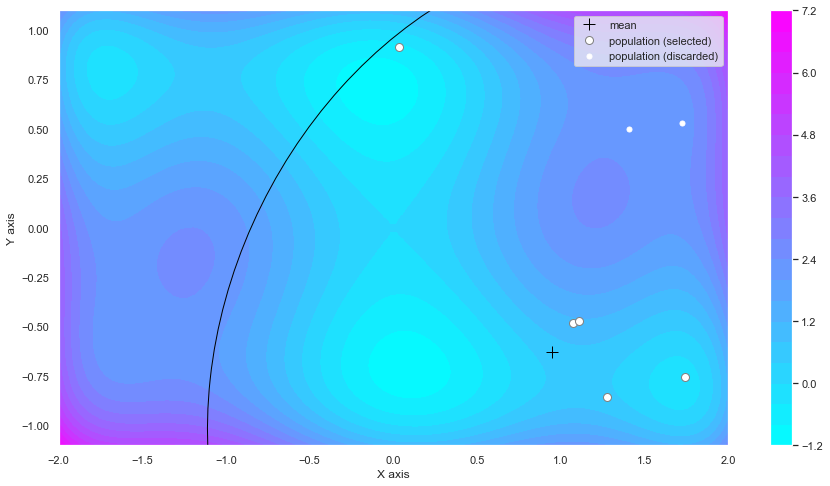

In [6]:
generation = 2
trace = cma.trace[generation]
mean = trace['m']
B = trace['B']
D = trace['D']
l = np.diagonal(trace['D'])**2
population = trace['population']

f, ax = plot_2d_contour(
    fitness_fn,
    xlim=[-2, 2], 
    ylim=[-1.1, 1.1],
    mean=mean,
    solutions=population,
)
draw_confidence_ellipse(ax, mean, B, l);

In [7]:
z = tf.random.normal((10, 2), dtype=tf.float64)
zb = tf.matmul(z, B)
zbd = tf.matmul(z, tf.matmul(B, D))

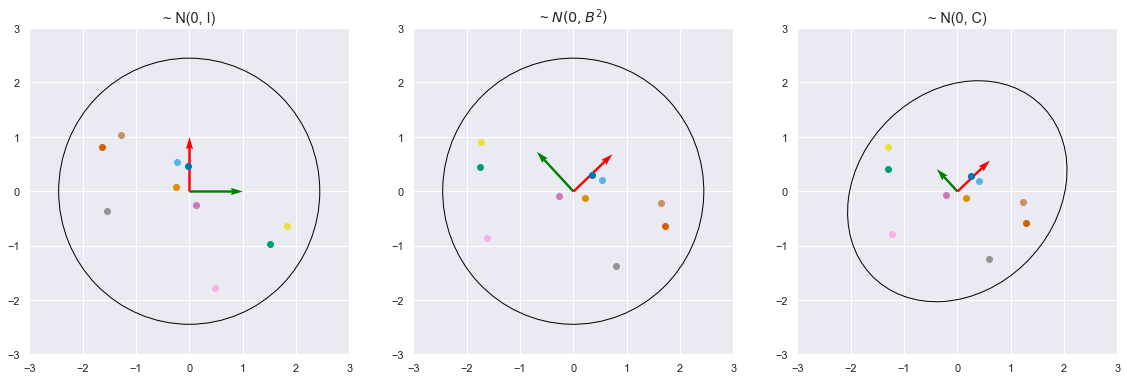

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3 * 6 + 1.5, 6))

for x, y in z.numpy():
    ax1.plot(x, y, 'o')

ax1.set_xlim([-3, 3]);
ax1.set_ylim([-3, 3]);
draw_confidence_ellipse(ax1, [0, 0], np.eye(2), [1, 1]);
origin = [0], [0]
ax1.quiver(*origin, [1], [0], color='green', angles='xy', scale_units='xy', scale=1);
ax1.quiver(*origin, [0], [1], color='red', angles='xy', scale_units='xy', scale=1);
ax1.set_title('~ N(0, I)', fontdict=dict(fontsize='large'));

for x, y in zb.numpy():
    ax2.plot(x, y, 'o')

ax2.set_xlim([-3, 3]);
ax2.set_ylim([-3, 3]);
draw_confidence_ellipse(ax2, [0, 0], B, [1, 1]);
ax2.quiver(*origin, [B[0][0]], [B[0][1]], color='green', angles='xy', scale_units='xy', scale=1);
ax2.quiver(*origin, [B[1][0]], [B[1][1]], color='red', angles='xy', scale_units='xy', scale=1);
ax2.set_title('~ ' + '$N(0, B^2)$', fontdict=dict(fontsize='large'))

for x, y in zbd.numpy():
    ax3.plot(x, y, 'o')

ax3.set_xlim([-3, 3]);
ax3.set_ylim([-3, 3]);
draw_confidence_ellipse(ax3, [0, 0], B, l);
ax3.quiver(*origin, [l[0] * B[0][0]], [l[0] * B[0][1]], color='green', angles='xy', scale_units='xy', scale=1);
ax3.quiver(*origin, [l[1] * B[1][0]], [l[1] * B[1][1]], color='red', angles='xy', scale_units='xy', scale=1);
ax3.set_title('~ N(0, C)', fontdict=dict(fontsize='large'));

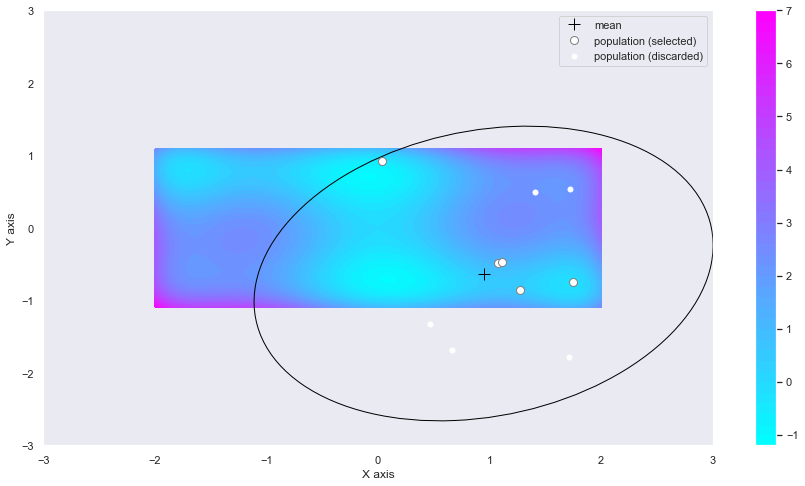

In [9]:
f, ax = plot_2d_contour(
    fitness_fn,
    xlim=[-2, 2], 
    ylim=[-1.1, 1.1],
    mean=mean,
    solutions=population,
    levels=50,
)
draw_confidence_ellipse(ax, mean, B, l);
ax.set_xlim([-3, 3]);
ax.set_ylim([-3, 3]);

In [10]:
def rosenbrock_fn(x):
    """
    Rosenbrock Function
    https://www.sfu.ca/~ssurjano/rosen.html
    """
    dimension = tf.shape(x)[1].numpy()
    l = []
    for i in range(dimension - 1):
        l.append(100 * (x[:,i+1] - x[:,i]**2)**2 + (x[:,i] - 1)**2)
    
    return tf.reduce_sum(l, axis=0)

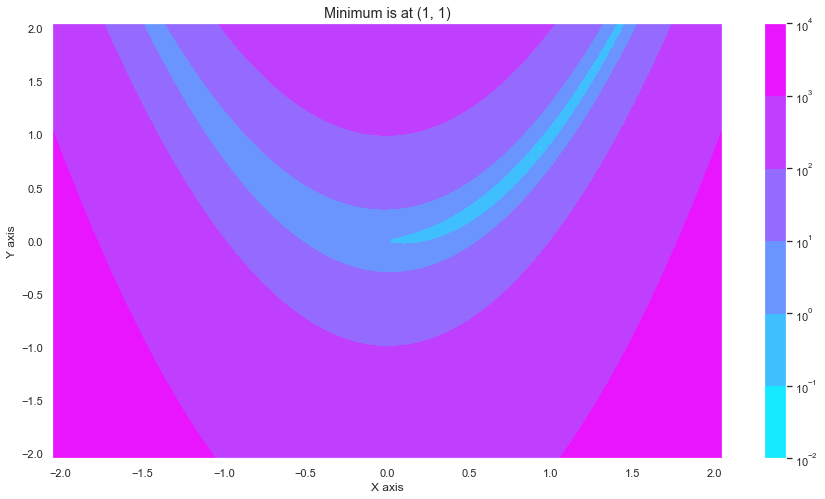

In [19]:
f, ax = plot_2d_contour(
    rosenbrock_fn,
    xlim=[-2.048, 2.048], 
    ylim=[-2.048, 2.048],
    log_scale=True,
    levels=10,
)
ax.set_title('Minimum is at (1, 1)', fontdict=dict(fontsize='large'));